# Voxel VAE-GAN Training

This notebook is designed to provide a wholistic vae-gan training experience. You can adjust the model and training parameters through the sacred configuration file, you can view training progress in tensorboard, and you can (wip) create reconstructions with the saved models!

## Setup

In [1]:
import env
from train_vaegan import train_vaegan

# plot things
%matplotlib inline
# autoreload modules
%load_ext autoreload
%autoreload 2

## Prepare Sacred Experiment

In [2]:
from sacred.observers import FileStorageObserver
from sacred import Experiment

ex = Experiment(name='voxel_vaegan_notebook', interactive=True)
ex.observers.append(FileStorageObserver.create('experiments_vaegan'))

@ex.main
def run_experiment(cfg):
    train_vaegan(cfg)

import datetime
last_model_dir = None

## Prepare Model Config

The model dir is generated with a timestamp. This keeps you from overwriting past results and keeps results separate to avoid confusing tensorboard.

But be warned! These model dirs can take up space, so you might need to periodically go back and delete ones you do not care about.

Also, if you ever train a model that you would really like to keep, I recommend moving it to a new directory with a special name like "best_model_ever".

In [3]:
MODEL_DIR = 'voxel_vaegan1/{}'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
print(MODEL_DIR)

cfg = {
    'cfg': {
        "dataset": {
            "index": "../data/processed/thingi10k_index.csv",
            "tag": "animal",
            "pctile": 0.9
        },
        "model": {
            "ckpt_dir": MODEL_DIR,
            "voxels_dim": 32,
            "batch_size": 22,
            "example_stl_id": 126660,
            "voxel_prob_threshold": 0.065,
            "enc_lr": 0.0001,
            "dec_lr": 0.0001,
            "dis_lr": 0.0001,
            "keep_prob": 1.0,
            "kl_div_loss_weight": 1,
            "recon_loss_weight": 10,            
            "latent_dim": 100,
            "verbose": False,
            "debug": False,
            "generator_verbose": False,
            "epochs": 100,
            "input_repeats": 1,
            "display_step": 10,
            "save_step": 10,
            'launch_tensorboard': True,
            'tb_dir': 'tb'
        }
    }
}

voxel_vaegan1/2019-03-07_15-39-45


## Tensorboard Prep

We launch tensorboard with a call to the python subprocess module. Sometimes, that process does not die with the rest of the experiment and lingers on as a system process. This becomes a problem when we try to initialize tensorboard for the next experiment because they cannot share the same port!

The function below is designed to solve this problem. It uses the linux pgrep utility to search for existing tensorboard processes and kill them. Note that this probably won't work on Windows.

In [4]:
from utils import kill_tensorboard

kill_tensorboard()

['pgrep', 'tensorboard'] yielded -> b'10879\n'
killed!


## Training

We start with a check that we are not attempting to overwrite the last MODEL_DIR. If you are blocked by the assert, re-execute the cfg code above to generate a new MODEL_DIR. This will allow you to move ahead with training.

The sacred experiment will save away a copy of your experiment settings in an experiments directory. This can be accessed later in case we need to retrieve a prime config.

If tensorboard is enabled, tune in at localhost:6006 or your_ip:6006
   

WARNING - root - Added new config entry: "cfg.dataset.index"
WARNING - root - Added new config entry: "cfg.dataset.pctile"
WARNING - root - Added new config entry: "cfg.dataset.tag"
WARNING - root - Added new config entry: "cfg.model.batch_size"
WARNING - root - Added new config entry: "cfg.model.ckpt_dir"
WARNING - root - Added new config entry: "cfg.model.debug"
WARNING - root - Added new config entry: "cfg.model.dec_lr"
WARNING - root - Added new config entry: "cfg.model.dis_lr"
WARNING - root - Added new config entry: "cfg.model.display_step"
WARNING - root - Added new config entry: "cfg.model.enc_lr"
WARNING - root - Added new config entry: "cfg.model.epochs"
WARNING - root - Added new config entry: "cfg.model.example_stl_id"
WARNING - root - Added new config entry: "cfg.model.generator_verbose"
WARNING - root - Added new config entry: "cfg.model.input_repeats"
WARNING - root - Added new config entry: "cfg.model.keep_prob"
WARNING - root - Added new config entry: "cfg.model.kl_div

Logging to /home/jcworkma/jack/3d-form/src/logs/2019-03-07_15-39__root.log
Starting train_vaegan main
Using thingi10k with index ../data/processed/thingi10k_index.csv and pctile 0.9
Filtering thingi10k by tag: animal
Thingi10k n_input=154
Num input = 154
Num batches per epoch = 7.00
Initializing VoxelVaegan
['tensorboard', '--logdir', '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-07_15-39-45/tb']
Epoch: 0, Batch: 0, Elapsed time: 0.01 mins
	KL Divergence = 8.018070220947266, Reconstruction Loss = 2020.8544921875, -dis_loss = -0.3488335907459259, dec_loss = -0.07885026931762695
Epoch: 0, Batch: 1, Elapsed time: 0.06 mins
	KL Divergence = 36.07398223876953, Reconstruction Loss = 1862.00537109375, -dis_loss = -7.70049524307251, dec_loss = 7.243394374847412
Epoch: 0, Batch: 2, Elapsed time: 0.11 mins
	KL Divergence = 7.7873735427856445, Reconstruction Loss = 1929.103271484375, -dis_loss = -14.50737190246582, dec_loss = 14.300211906433105
Epoch: 0, Batch: 3, Elapsed time:

Epoch: 6, Batch: 1, Elapsed time: 2.04 mins
	KL Divergence = 0.2347927987575531, Reconstruction Loss = 1858.54052734375, -dis_loss = -234.58834838867188, dec_loss = 167.06301879882812
Epoch: 6, Batch: 2, Elapsed time: 2.09 mins
	KL Divergence = 0.2151278555393219, Reconstruction Loss = 1924.6409912109375, -dis_loss = -224.3143768310547, dec_loss = 165.9595947265625
Epoch: 6, Batch: 3, Elapsed time: 2.14 mins
	KL Divergence = 0.2767801880836487, Reconstruction Loss = 1903.923583984375, -dis_loss = -250.94500732421875, dec_loss = 173.3236083984375
Epoch: 6, Batch: 4, Elapsed time: 2.18 mins
	KL Divergence = 0.202487975358963, Reconstruction Loss = 1783.0712890625, -dis_loss = -239.59579467773438, dec_loss = 171.89378356933594
Epoch: 6, Batch: 5, Elapsed time: 2.23 mins
	KL Divergence = 0.2528243660926819, Reconstruction Loss = 2132.64208984375, -dis_loss = -272.44219970703125, dec_loss = 179.33438110351562
Epoch: 6, Batch: 6, Elapsed time: 2.27 mins
	KL Divergence = 0.1360330581665039, R

	KL Divergence = 0.014513552188873291, Reconstruction Loss = 1791.165283203125, -dis_loss = -443.93408203125, dec_loss = 268.2808532714844
Epoch: 12, Batch: 2, Elapsed time: 4.07 mins
	KL Divergence = 0.006495147943496704, Reconstruction Loss = 1848.5655517578125, -dis_loss = -442.561279296875, dec_loss = 275.6213684082031
Epoch: 12, Batch: 3, Elapsed time: 4.12 mins
	KL Divergence = 0.009939849376678467, Reconstruction Loss = 1818.42529296875, -dis_loss = -466.4586486816406, dec_loss = 275.5724182128906
Epoch: 12, Batch: 4, Elapsed time: 4.17 mins
	KL Divergence = 0.009401917457580566, Reconstruction Loss = 1696.8585205078125, -dis_loss = -469.8072204589844, dec_loss = 281.339599609375
Epoch: 12, Batch: 5, Elapsed time: 4.21 mins
	KL Divergence = 0.006041616201400757, Reconstruction Loss = 2006.24560546875, -dis_loss = -494.1534423828125, dec_loss = 284.2690734863281
Epoch: 12, Batch: 6, Elapsed time: 4.26 mins
	KL Divergence = 0.00835484266281128, Reconstruction Loss = 1733.348632812

Epoch: 18, Batch: 4, Elapsed time: 6.15 mins
	KL Divergence = 0.23528653383255005, Reconstruction Loss = 1053.346923828125, -dis_loss = -652.146484375, dec_loss = 367.23828125
Epoch: 18, Batch: 5, Elapsed time: 6.19 mins
	KL Divergence = 0.1324123740196228, Reconstruction Loss = 1137.711181640625, -dis_loss = -678.9874267578125, dec_loss = 378.86187744140625
Epoch: 18, Batch: 6, Elapsed time: 6.24 mins
	KL Divergence = 0.17183345556259155, Reconstruction Loss = 1225.9061279296875, -dis_loss = -654.9908447265625, dec_loss = 374.01483154296875
Epoch: 19, Batch: 0, Elapsed time: 6.29 mins
	KL Divergence = 0.12238037586212158, Reconstruction Loss = 1263.8529052734375, -dis_loss = -657.5805053710938, dec_loss = 365.62371826171875
Epoch: 19, Batch: 1, Elapsed time: 6.34 mins
	KL Divergence = 0.14499828219413757, Reconstruction Loss = 1156.3603515625, -dis_loss = -626.5347900390625, dec_loss = 367.0395812988281
Epoch: 19, Batch: 2, Elapsed time: 6.38 mins
	KL Divergence = 0.32670268416404724,

Epoch: 24, Batch: 5, Elapsed time: 8.19 mins
	KL Divergence = 3.3116044998168945, Reconstruction Loss = 1874.38037109375, -dis_loss = -830.346435546875, dec_loss = 456.75775146484375
Epoch: 24, Batch: 6, Elapsed time: 8.23 mins
	KL Divergence = 3.290358066558838, Reconstruction Loss = 1970.480712890625, -dis_loss = -781.5369262695312, dec_loss = 447.92034912109375
Epoch: 25, Batch: 0, Elapsed time: 8.28 mins
	KL Divergence = 2.470001459121704, Reconstruction Loss = 2633.725830078125, -dis_loss = -806.407470703125, dec_loss = 433.5440673828125
Epoch: 25, Batch: 1, Elapsed time: 8.33 mins
	KL Divergence = 2.1286559104919434, Reconstruction Loss = 2196.483154296875, -dis_loss = -787.06396484375, dec_loss = 458.0422668457031
Epoch: 25, Batch: 2, Elapsed time: 8.38 mins
	KL Divergence = 2.971576690673828, Reconstruction Loss = 2419.888671875, -dis_loss = -798.4935913085938, dec_loss = 456.1728515625
Epoch: 25, Batch: 3, Elapsed time: 8.42 mins
	KL Divergence = 4.942780494689941, Reconstruct

	KL Divergence = 13.284090995788574, Reconstruction Loss = 4279.232421875, -dis_loss = -931.525634765625, dec_loss = 523.16259765625
Epoch: 31, Batch: 0, Elapsed time: 10.27 mins
	KL Divergence = 10.977385520935059, Reconstruction Loss = 4726.25390625, -dis_loss = -960.40625, dec_loss = 489.84783935546875
Epoch: 31, Batch: 1, Elapsed time: 10.32 mins
	KL Divergence = 9.180670738220215, Reconstruction Loss = 5499.19873046875, -dis_loss = -946.9583740234375, dec_loss = 530.5775146484375
Epoch: 31, Batch: 2, Elapsed time: 10.37 mins
	KL Divergence = 12.26367473602295, Reconstruction Loss = 5470.302734375, -dis_loss = -949.4200439453125, dec_loss = 524.1188354492188
Epoch: 31, Batch: 3, Elapsed time: 10.42 mins
	KL Divergence = 12.477638244628906, Reconstruction Loss = 4197.439453125, -dis_loss = -1011.005615234375, dec_loss = 537.56103515625
Epoch: 31, Batch: 4, Elapsed time: 10.47 mins
	KL Divergence = 9.104462623596191, Reconstruction Loss = 4805.802734375, -dis_loss = -1005.82623291015

Epoch: 37, Batch: 3, Elapsed time: 12.41 mins
	KL Divergence = 28.31317138671875, Reconstruction Loss = 11234.861328125, -dis_loss = -1006.8807983398438, dec_loss = 468.68499755859375
Epoch: 37, Batch: 4, Elapsed time: 12.46 mins
	KL Divergence = 24.308685302734375, Reconstruction Loss = 9675.4287109375, -dis_loss = -995.488037109375, dec_loss = 506.86968994140625
Epoch: 37, Batch: 5, Elapsed time: 12.50 mins
	KL Divergence = 22.654544830322266, Reconstruction Loss = 16431.302734375, -dis_loss = -961.0650634765625, dec_loss = 487.3914489746094
Epoch: 37, Batch: 6, Elapsed time: 12.55 mins
	KL Divergence = 22.92574119567871, Reconstruction Loss = 10689.3447265625, -dis_loss = -938.7861938476562, dec_loss = 482.8292541503906
Epoch: 38, Batch: 0, Elapsed time: 12.60 mins
	KL Divergence = 22.310396194458008, Reconstruction Loss = 15501.6171875, -dis_loss = -1011.4322509765625, dec_loss = 462.82537841796875
Epoch: 38, Batch: 1, Elapsed time: 12.65 mins
	KL Divergence = 23.192729949951172, R

	KL Divergence = 52.049652099609375, Reconstruction Loss = 28123.64453125, -dis_loss = -844.96533203125, dec_loss = 356.02899169921875
Epoch: 43, Batch: 5, Elapsed time: 14.50 mins
	KL Divergence = 49.243350982666016, Reconstruction Loss = 34620.6640625, -dis_loss = -765.4703369140625, dec_loss = 277.09344482421875
Epoch: 43, Batch: 6, Elapsed time: 14.55 mins
	KL Divergence = 60.26103210449219, Reconstruction Loss = 23977.103515625, -dis_loss = -774.14013671875, dec_loss = 304.9222412109375
Epoch: 44, Batch: 0, Elapsed time: 14.60 mins
	KL Divergence = 51.20502853393555, Reconstruction Loss = 28513.162109375, -dis_loss = -796.826416015625, dec_loss = 326.5553894042969
Epoch: 44, Batch: 1, Elapsed time: 14.64 mins
	KL Divergence = 50.368446350097656, Reconstruction Loss = 27089.169921875, -dis_loss = -756.1026611328125, dec_loss = 302.6570129394531
Epoch: 44, Batch: 2, Elapsed time: 14.69 mins
	KL Divergence = 60.06121826171875, Reconstruction Loss = 26712.3125, -dis_loss = -599.556457

Model saved in path: /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-07_15-39-45/model_epoch-49.ckpt
Metrics saved in path: /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-07_15-39-45/metrics.json
Epoch: 50, Batch: 0, Elapsed time: 16.59 mins
	KL Divergence = 30.588449478149414, Reconstruction Loss = 37521.5, -dis_loss = -902.6636962890625, dec_loss = 324.19122314453125
Epoch: 50, Batch: 1, Elapsed time: 16.64 mins
	KL Divergence = 42.24150466918945, Reconstruction Loss = 31209.73828125, -dis_loss = -800.6558227539062, dec_loss = 269.90576171875
Epoch: 50, Batch: 2, Elapsed time: 16.69 mins
	KL Divergence = 38.813358306884766, Reconstruction Loss = 31839.380859375, -dis_loss = -751.43603515625, dec_loss = 319.3297424316406
Epoch: 50, Batch: 3, Elapsed time: 16.73 mins
	KL Divergence = 45.75194549560547, Reconstruction Loss = 32087.765625, -dis_loss = -795.6278076171875, dec_loss = 280.1988830566406
Epoch: 50, Batch: 4, Elapsed time: 16.78 mins
	KL Diverg

Epoch: 56, Batch: 3, Elapsed time: 18.71 mins
	KL Divergence = 53.516780853271484, Reconstruction Loss = 23768.38671875, -dis_loss = -902.4775390625, dec_loss = 469.1940002441406
Epoch: 56, Batch: 4, Elapsed time: 18.76 mins
	KL Divergence = 55.52582550048828, Reconstruction Loss = 24235.115234375, -dis_loss = -1137.8546142578125, dec_loss = 492.88330078125
Epoch: 56, Batch: 5, Elapsed time: 18.81 mins
	KL Divergence = 41.87065887451172, Reconstruction Loss = 30480.0, -dis_loss = -954.5185546875, dec_loss = 358.9283752441406
Epoch: 56, Batch: 6, Elapsed time: 18.85 mins
	KL Divergence = 49.85267639160156, Reconstruction Loss = 22420.931640625, -dis_loss = -945.4261474609375, dec_loss = 463.2337646484375
Epoch: 57, Batch: 0, Elapsed time: 18.90 mins
	KL Divergence = 34.0478515625, Reconstruction Loss = 30248.533203125, -dis_loss = -1071.802734375, dec_loss = 439.6995849609375
Epoch: 57, Batch: 1, Elapsed time: 18.95 mins
	KL Divergence = 35.916603088378906, Reconstruction Loss = 26145.3

Epoch: 62, Batch: 5, Elapsed time: 20.80 mins
	KL Divergence = 49.167640686035156, Reconstruction Loss = 32867.671875, -dis_loss = -1256.29052734375, dec_loss = 558.509765625
Epoch: 62, Batch: 6, Elapsed time: 20.85 mins
	KL Divergence = 47.61563491821289, Reconstruction Loss = 27264.9765625, -dis_loss = -1039.19140625, dec_loss = 468.9620056152344
Epoch: 63, Batch: 0, Elapsed time: 20.89 mins
	KL Divergence = 35.362430572509766, Reconstruction Loss = 30182.06640625, -dis_loss = -1295.51123046875, dec_loss = 552.4950561523438
Epoch: 63, Batch: 1, Elapsed time: 20.94 mins
	KL Divergence = 35.77362823486328, Reconstruction Loss = 25932.046875, -dis_loss = -1181.828857421875, dec_loss = 583.2069702148438
Epoch: 63, Batch: 2, Elapsed time: 20.99 mins
	KL Divergence = 44.5770263671875, Reconstruction Loss = 26620.0703125, -dis_loss = -1044.827880859375, dec_loss = 531.7637939453125
Epoch: 63, Batch: 3, Elapsed time: 21.04 mins
	KL Divergence = 44.94738006591797, Reconstruction Loss = 25532.

Epoch: 69, Batch: 2, Elapsed time: 22.98 mins
	KL Divergence = 40.0603141784668, Reconstruction Loss = 24622.251953125, -dis_loss = -1327.0137939453125, dec_loss = 674.0825805664062
Epoch: 69, Batch: 3, Elapsed time: 23.02 mins
	KL Divergence = 47.055809020996094, Reconstruction Loss = 23234.625, -dis_loss = -1217.82568359375, dec_loss = 706.3120727539062
Epoch: 69, Batch: 4, Elapsed time: 23.07 mins
	KL Divergence = 37.51033020019531, Reconstruction Loss = 22112.6953125, -dis_loss = -1409.762939453125, dec_loss = 677.3297729492188
Epoch: 69, Batch: 5, Elapsed time: 23.12 mins
	KL Divergence = 37.11323547363281, Reconstruction Loss = 31707.109375, -dis_loss = -1416.7384033203125, dec_loss = 694.2986450195312
Epoch: 69, Batch: 6, Elapsed time: 23.16 mins
	KL Divergence = 40.60730743408203, Reconstruction Loss = 23395.4375, -dis_loss = -1314.116455078125, dec_loss = 602.0650634765625
Epoch: 70, Loss = 12.81339, KL Divergence = 40.60731, Reconstruction Loss = 23395.43750, -dis_Loss = -131

Epoch: 75, Batch: 4, Elapsed time: 25.07 mins
	KL Divergence = 43.83010482788086, Reconstruction Loss = 21281.322265625, -dis_loss = -1473.0594482421875, dec_loss = 669.3433227539062
Epoch: 75, Batch: 5, Elapsed time: 25.11 mins
	KL Divergence = 45.16109085083008, Reconstruction Loss = 24892.53515625, -dis_loss = -1661.115234375, dec_loss = 840.6311645507812
Epoch: 75, Batch: 6, Elapsed time: 25.16 mins
	KL Divergence = 49.00323486328125, Reconstruction Loss = 19092.3046875, -dis_loss = -1558.0892333984375, dec_loss = 788.18701171875
Epoch: 76, Batch: 0, Elapsed time: 25.21 mins
	KL Divergence = 42.601158142089844, Reconstruction Loss = 24961.296875, -dis_loss = -1610.2191162109375, dec_loss = 820.2581787109375
Epoch: 76, Batch: 1, Elapsed time: 25.26 mins
	KL Divergence = 36.031925201416016, Reconstruction Loss = 22665.333984375, -dis_loss = -1551.256591796875, dec_loss = 832.5859375
Epoch: 76, Batch: 2, Elapsed time: 25.31 mins
	KL Divergence = 40.54716491699219, Reconstruction Loss 

Epoch: 81, Batch: 6, Elapsed time: 27.17 mins
	KL Divergence = 42.16568374633789, Reconstruction Loss = 18326.640625, -dis_loss = -1705.088134765625, dec_loss = 875.5101318359375
Epoch: 82, Batch: 0, Elapsed time: 27.21 mins
	KL Divergence = 40.84124755859375, Reconstruction Loss = 23050.6640625, -dis_loss = -1807.431640625, dec_loss = 894.3638916015625
Epoch: 82, Batch: 1, Elapsed time: 27.26 mins
	KL Divergence = 37.44533157348633, Reconstruction Loss = 22594.03125, -dis_loss = -1748.637451171875, dec_loss = 953.9428100585938
Epoch: 82, Batch: 2, Elapsed time: 27.31 mins
	KL Divergence = 40.60382843017578, Reconstruction Loss = 21995.126953125, -dis_loss = -1685.7659912109375, dec_loss = 846.5228271484375
Epoch: 82, Batch: 3, Elapsed time: 27.36 mins
	KL Divergence = 47.4940071105957, Reconstruction Loss = 20989.216796875, -dis_loss = -1561.84423828125, dec_loss = 945.3245849609375
Epoch: 82, Batch: 4, Elapsed time: 27.41 mins
	KL Divergence = 39.344200134277344, Reconstruction Loss 

Epoch: 88, Batch: 3, Elapsed time: 29.36 mins
	KL Divergence = 41.677276611328125, Reconstruction Loss = 20990.6015625, -dis_loss = -1675.431884765625, dec_loss = 998.2877807617188
Epoch: 88, Batch: 4, Elapsed time: 29.41 mins
	KL Divergence = 32.63900375366211, Reconstruction Loss = 20960.123046875, -dis_loss = -1583.34375, dec_loss = 578.4879150390625
Epoch: 88, Batch: 5, Elapsed time: 29.45 mins
	KL Divergence = 38.86185836791992, Reconstruction Loss = 26707.93359375, -dis_loss = -1969.81201171875, dec_loss = 973.2174072265625
Epoch: 88, Batch: 6, Elapsed time: 29.50 mins
	KL Divergence = 35.5949821472168, Reconstruction Loss = 22784.927734375, -dis_loss = -1849.056396484375, dec_loss = 936.1615600585938
Epoch: 89, Batch: 0, Elapsed time: 29.55 mins
	KL Divergence = 36.019813537597656, Reconstruction Loss = 25287.162109375, -dis_loss = -1955.39404296875, dec_loss = 947.7351684570312
Epoch: 89, Batch: 1, Elapsed time: 29.60 mins
	KL Divergence = 32.83595275878906, Reconstruction Loss

Epoch: 94, Batch: 5, Elapsed time: 31.45 mins
	KL Divergence = 46.405757904052734, Reconstruction Loss = 24629.013671875, -dis_loss = -2238.480712890625, dec_loss = 1091.5467529296875
Epoch: 94, Batch: 6, Elapsed time: 31.50 mins
	KL Divergence = 46.3392333984375, Reconstruction Loss = 19438.6328125, -dis_loss = -2085.996826171875, dec_loss = 1128.8431396484375
Epoch: 95, Batch: 0, Elapsed time: 31.54 mins
	KL Divergence = 44.04351043701172, Reconstruction Loss = 24470.52734375, -dis_loss = -2229.4580078125, dec_loss = 1055.8900146484375
Epoch: 95, Batch: 1, Elapsed time: 31.59 mins
	KL Divergence = 39.23442840576172, Reconstruction Loss = 20811.57421875, -dis_loss = -2129.68408203125, dec_loss = 1146.8438720703125
Epoch: 95, Batch: 2, Elapsed time: 31.64 mins
	KL Divergence = 46.498046875, Reconstruction Loss = 23551.845703125, -dis_loss = -2138.75830078125, dec_loss = 1137.3505859375
Epoch: 95, Batch: 3, Elapsed time: 31.69 mins
	KL Divergence = 44.616458892822266, Reconstruction Los

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


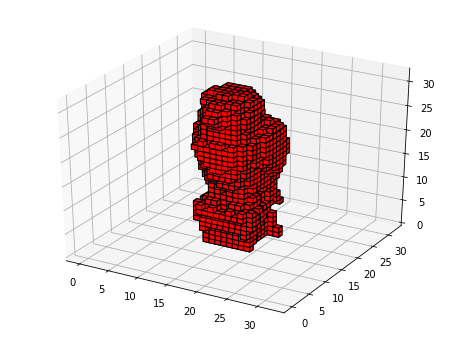

update_title_pos
update_title_pos
update_title_pos
update_title_pos


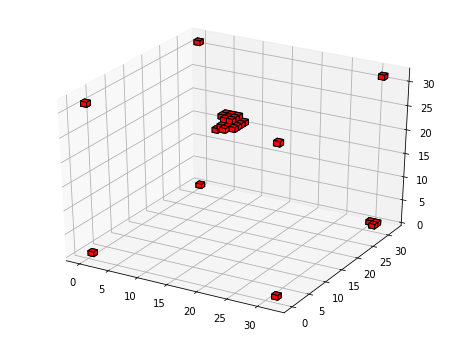

In [5]:
if last_model_dir == MODEL_DIR:
    print('dont overwrite!')
    assert False
else:
    last_model_dir = MODEL_DIR

ex.run(config_updates=cfg)

## Reconstructions

Here we can reload a model and experiment with reconstructions.

In [27]:
import tensorflow as tf
import numpy as np
from models.voxel_vaegan import VoxelVaegan
from data.voxels import plot_voxels

tf.reset_default_graph()

model = '/home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-07_15-39-45/model_epoch-99.ckpt'

In [28]:
# restore the model from ckpt
vaegan = VoxelVaegan.initFromCfg(cfg.get('cfg'))
vaegan.restore(model)

Initializing VoxelVaegan
INFO:tensorflow:Restoring parameters from /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-07_15-39-45/model_epoch-99.ckpt
Restoring parameters from /home/jcworkma/jack/3d-form/src/../models/voxel_vaegan1/2019-03-07_15-39-45/model_epoch-99.ckpt


update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


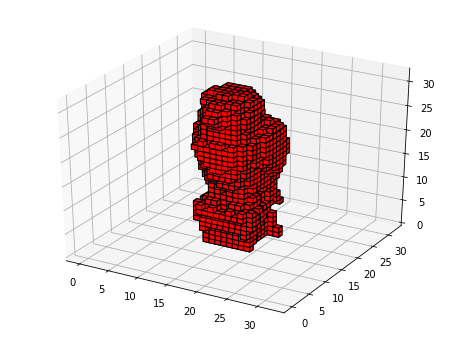

In [29]:
from data.thingi10k import Thingi10k
# get an stl example
thingi = Thingi10k.init10k()
stl_example = thingi.get_stl_path(stl_id=126660)
training_example = thingi.get_voxels(32, stl_file=stl_example)
plot_voxels(training_example)
training_example = np.reshape(training_example, (-1, 32, 32, 32, 1))

In [48]:
recon = vaegan.reconstruct(training_example)
recon = np.reshape(recon, [32, 32, 32])
print('max: ', np.max(recon))
print('min: ', np.min(recon))
print('mean: ', np.mean(recon))

max:  0.99999917
min:  0.0
mean:  0.00305376


<module 'matplotlib.pyplot' from '/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/matplotlib/pyplot.py'>

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


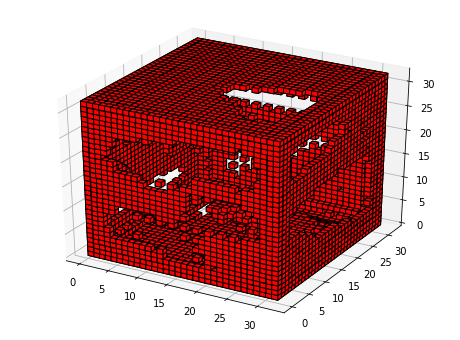

In [57]:
recon_threshold = recon > 0.00000000001
plot_voxels(recon_threshold)